In [2]:
#lucrul cu matrici si vectori
import numpy as np
# lucru cu tabele de date
import pandas as pd
#lucru realizarea graficilor
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importam data setul nostru
df = pd.read_csv('ParisHousing.csv')
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [4]:
# informatii despre tipurile de date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [5]:
# verificam cite valori lipsa este in data set
df.isna().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [6]:
# antrenam modelul de machine_learning, importam 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

In [8]:
# transfomam data frame in inpay, punem coloana care nu dorim so o afisam, va fi stearsa
X = df.drop(['cityCode'], axis=1)

In [9]:
X = df.drop(['price'], axis=1).values
y = df['price'].values

In [10]:
X

array([[75523,     3,     0, ...,   956,     0,     7],
       [80771,    39,     1, ...,   128,     1,     2],
       [55712,    58,     0, ...,   135,     1,     9],
       ...,
       [83841,     3,     0, ...,   345,     1,     9],
       [59036,    70,     0, ...,   339,     1,     4],
       [ 1440,    84,     0, ...,   278,     1,     6]], dtype=int64)

In [11]:
y

array([7559081.5, 8085989.5, 5574642.1, ..., 8390030.5, 5905107. ,
        146708.4])

In [12]:
# train este pentru antrenare, test este pentru testare
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [13]:
# KNN, prezicerea - aflam valoarea medie a celor mai apropiati k vecini
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [14]:
y_pred

array([8076034.62, 3733061.78, 8564629.5 , ...,  538868.6 , 2749524.18,
       5950046.72])

In [15]:
# verificam cit de bune sunt valorile noastre cit de bine se descurca
# la regresie se calculeaza eroarea
mean_squared_error(y_pred, y_test)

5847664158.119841

In [16]:
# in mediu greseste cu 0.72 %
mean_squared_error(y_pred, y_test)**(1/2)

76470.02130325217

In [17]:
# alta metoda de calculare a erorrei, importam MAE
from sklearn.metrics import mean_absolute_error

In [18]:
# in mediu eroarea
mean_absolute_error(y_pred, y_test)

60568.40194400003

In [19]:
# alta metoda cit de bine se descurca
test = pd.DataFrame(y_test, columns=['y_test'])

In [20]:
test['y_pred'] = y_pred

In [21]:
test

,y_test,y_pred
0,7964369.6,8076034.62
1,3713548.9,3733061.78
2,8553019.2,8564629.50
3,6428666.2,6532716.34
4,6465184.9,6567322.58
...,...,...
2495,5161447.9,5064148.60
2496,7248658.3,7205041.42
2497,541400.2,538868.60
2498,2744762.0,2749524.18


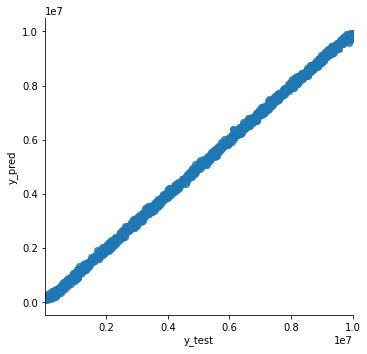

In [22]:
# graf la KNN 
sns.lmplot(data = test, x = 'y_test', y='y_pred')

In [23]:
# alta metoda, regresie liniara, optimizare cit mai mica sa fie
from sklearn.linear_model import LinearRegression

In [24]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = linear.predict(X_test)

In [26]:
mean_squared_error(y_pred, y_test)

3633660.396713503

In [27]:
mean_absolute_error(y_pred, y_test)

1491.6612375947968

In [28]:
test['y_test'] = y_test
test['y_pred'] = y_pred

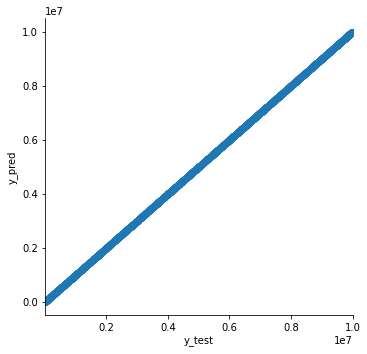

In [29]:
# eroarea este optimizata, mai bun
sns.lmplot(data = test, x = 'y_test', y='y_pred')

In [ ]:
# La KNeighborsRegressor eroarea este 60568.40194400003
# La LinearRegression eroarea este 1491.6612375947968
# reiese ca cea mai bun model este linearRegression, este nai optimizata
# corectat